**Import Library**

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
import seaborn as sns
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
stop = stopwords.words('english')
import seaborn as sns

import matplotlib.pyplot as plt
nltk.download('vader_lexicon')
from sklearn import feature_extraction
from sklearn.metrics import confusion_matrix
from sklearn import model_selection as ms
from sklearn import naive_bayes
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


**Import Dataset**

In [ ]:
# Read excel file with sheet name
data=pd.read_excel('/content/Test.xlsx',sheet_name=['Sheet1'])
# Get DataFrame from Dict
df = data .get('Sheet1')

**Dataset Info**

In [ ]:
df


,id,name,host_location,neighbourhood,neighbourhood_cleansed,latitude,longitude,price,review_scores_value,reviews
0,3168,TudorStudio,"Boston, MA","Newton, Massachusetts, United States",Brighton,42.351480,-71.193190,99,NaN,NaN
1,30387856,Charismatic 1BR in W. Village w/ Doorman & Gym,"New York, NY","New York, United States",Ward E (councilmember James Solomon),40.729222,-74.002791,418,1.00,Lots of problems/maintenance ussues with the a...
2,5506,** Fort Hill Inn Private! Minutes to center!**,"Boston, MA","Boston, Massachusetts, United States",Roxbury,42.328440,-71.095810,149,4.73,I stayed at Terry's for 3 nights. The guest ro...
3,6695,"Fort Hill Inn *Sunny* 1 bedroom, condo duplex","Boston, MA","Boston, Massachusetts, United States",Roxbury,42.328020,-71.093870,179,4.71,NaN
4,7903,"Colorful, modern 2 BR apt shared with host","Somerville, MA","Somerville, Massachusetts, United States",Charlestown,42.390310,-71.093610,116,4.80,NaN
...,...,...,...,...,...,...,...,...,...,...
5207,24246244,The Little Green Bungalow,"Nashville, TN","Nashville, Tennessee, United States",District 7,36.203300,-86.731020,129,4.99,We were so impressed with the cleanliness of t...
5208,32958841,Goodwin Oasis,"Nashville, TN","Nashville, Tennessee, United States",District 29,36.089940,-86.623970,203,4.99,The Wildcat Cottage was amazing to stay at! Be...
5209,33013006,Charming and Private Detached Guesthouse in Ea...,"Nashville, TN","Nashville, Tennessee, United States",District 8,36.229690,-86.727730,86,4.99,"Very clean, even cuter in person than the pict..."
5210,34331421,Spacious basement guest suite near airport/dwntn,"Nashville, TN","Nashville, Tennessee, United States",District 15,36.184250,-86.673460,110,4.99,"Beautiful home, incredibly relaxing and enjoya..."


**Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5212 entries, 0 to 5211
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      5212 non-null   int64  
 1   name                    5209 non-null   object 
 2   host_location           4505 non-null   object 
 3   neighbourhood           3453 non-null   object 
 4   neighbourhood_cleansed  5212 non-null   object 
 5   latitude                5212 non-null   float64
 6   longitude               5212 non-null   float64
 7   price                   5212 non-null   int64  
 8   review_scores_value     3975 non-null   float64
 9   reviews                 79 non-null     object 
dtypes: float64(3), int64(2), object(5)
memory usage: 407.3+ KB


In [ ]:
 df = df.dropna(subset=['reviews'])

In [ ]:
df

,id,name,host_location,neighbourhood,neighbourhood_cleansed,latitude,longitude,price,review_scores_value,reviews
1,30387856,Charismatic 1BR in W. Village w/ Doorman & Gym,"New York, NY","New York, United States",Ward E (councilmember James Solomon),40.729222,-74.002791,418,1.00,Lots of problems/maintenance ussues with the a...
2,5506,** Fort Hill Inn Private! Minutes to center!**,"Boston, MA","Boston, Massachusetts, United States",Roxbury,42.328440,-71.095810,149,4.73,I stayed at Terry's for 3 nights. The guest ro...
183,33607399,"FiDi 1BR w/ Roofdeck, Gym & Doorman nr Wall St.","New York, NY","New York, United States",Ward F (councilmember Jermaine D. Robinson),40.705040,-74.008120,547,1.00,This was the worst experience I have had with ...
206,34420009,LUX CONDO 15 Min Times Square NYC Organic Smar...,NaN,"Jersey City, New Jersey, United States",Ward C (councilmember Richard Boggiano),40.738130,-74.047990,109,1.00,My favorite thing about living here was when I...
253,46006086,"Modern, Clean 1BR in Hudson Exchange w/ Gym + ...",NaN,"Jersey City, New Jersey, United States",Ward E (councilmember James Solomon),40.724545,-74.035912,417,1.00,"Terrible experience, waited over 3 hours with ..."
...,...,...,...,...,...,...,...,...,...,...
5207,24246244,The Little Green Bungalow,"Nashville, TN","Nashville, Tennessee, United States",District 7,36.203300,-86.731020,129,4.99,We were so impressed with the cleanliness of t...
5208,32958841,Goodwin Oasis,"Nashville, TN","Nashville, Tennessee, United States",District 29,36.089940,-86.623970,203,4.99,The Wildcat Cottage was amazing to stay at! Be...
5209,33013006,Charming and Private Detached Guesthouse in Ea...,"Nashville, TN","Nashville, Tennessee, United States",District 8,36.229690,-86.727730,86,4.99,"Very clean, even cuter in person than the pict..."
5210,34331421,Spacious basement guest suite near airport/dwntn,"Nashville, TN","Nashville, Tennessee, United States",District 15,36.184250,-86.673460,110,4.99,"Beautiful home, incredibly relaxing and enjoya..."


In [ ]:
# convert the text to string type
df['reviews']=df['reviews'].astype(str)
df['reviews']

1       Lots of problems/maintenance ussues with the a...
2       I stayed at Terry's for 3 nights. The guest ro...
183     This was the worst experience I have had with ...
206     My favorite thing about living here was when I...
253     Terrible experience, waited over 3 hours with ...
                              ...                        
5207    We were so impressed with the cleanliness of t...
5208    The Wildcat Cottage was amazing to stay at! Be...
5209    Very clean, even cuter in person than the pict...
5210    Beautiful home, incredibly relaxing and enjoya...
5211    Cannot say enough good things about our stay a...
Name: reviews, Length: 79, dtype: object

In [ ]:
#re library for making regex
import re

#convert the text to lower
df['reviews']=df['reviews'].str.lower()

# # Proprocessing the data
# Code to remove the Hashtags from the reviews
df['reviews']=df['reviews'].apply(lambda x:re.sub(r'\B#\S+',' ',str(x)))

# Code to remove the links from the reviews
df['reviews']=df['reviews'].apply(lambda x:re.sub(r"http\S+", " ", x))

# Code to remove the Special characters from the reviews 
df['reviews']=df['reviews'].apply(lambda x:' '.join(re.findall(r'\w+', x)))

# Code to substitute the multiple spaces with single spaces
df['reviews']=df['reviews'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

# Code to remove all the single characters in the reviews
df['reviews']=df['reviews'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', ' ', x))

# Remove the twitter handlers
df['reviews']=df['reviews'].apply(lambda x:re.sub('@[^\s]+',' ',x))

# remove html tags
clean = re.compile('<.*?>')
df['reviews']=df['reviews'].apply(lambda x:re.sub(clean, '', x))
    
    
    
df['reviews']


1       lots of problems maintenance ussues with the a...
2       i stayed at terry for 3 nights the guest room ...
183     this was the worst experience have had with ai...
206     my favorite thing about living here was when g...
253     terrible experience waited over 3 hours with a...
                              ...                        
5207    we were so impressed with the cleanliness of t...
5208    the wildcat cottage was amazing to stay at bea...
5209    very clean even cuter in person than the pictu...
5210    beautiful home incredibly relaxing and enjoyab...
5211    cannot say enough good things about our stay a...
Name: reviews, Length: 79, dtype: object

In [ ]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install googletrans

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from langdetect import detect
from googletrans import Translator
translator = Translator()

In [ ]:

#defining function to detect language and convert to english if it not in english
def detectlan(x):
  tex=detect(x)
  if(tex!='en'):
    translator.translate(x, dest='en')
    return x
  return x

  
            
   #calling the the function             
df['reviews'] = df['reviews'].apply(lambda x: detectlan(x))

In [ ]:
#seeing the results
df['reviews']

1       lots of problems maintenance ussues with the a...
2       i stayed at terry for 3 nights the guest room ...
183     this was the worst experience have had with ai...
206     my favorite thing about living here was when g...
253     terrible experience waited over 3 hours with a...
                              ...                        
5207    we were so impressed with the cleanliness of t...
5208    the wildcat cottage was amazing to stay at bea...
5209    very clean even cuter in person than the pictu...
5210    beautiful home incredibly relaxing and enjoyab...
5211    cannot say enough good things about our stay a...
Name: reviews, Length: 79, dtype: object

**Stop Word Remove**

In [ ]:

#toknize the reviews to word token
df['reviews']=df['reviews'].apply(word_tokenize)

#remove stop words from the tokens
df['reviews'] = df['reviews'].apply(lambda x: ' '.join([item for item in x if item not in stop]))
df['reviews'] 

1       lots problems maintenance ussues apartment mov...
2       stayed terry 3 nights guest room great clean e...
183     worst experience airbnb br br blueground horri...
206     favorite thing living got check absolutely ter...
253     terrible experience waited 3 hours baggage che...
                              ...                        
5207    impressed cleanliness house inside decorations...
5208    wildcat cottage amazing stay beautiful decor f...
5209    clean even cuter person pictures convenient do...
5210    beautiful home incredibly relaxing enjoyable i...
5211    say enough good things stay wildcat cottage as...
Name: reviews, Length: 79, dtype: object

In [ ]:
data=df[['reviews']]

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#EA570E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>Vader Sentiment Analysis</center>
</h1>
</div>

<blockquote><h1 style=" color:#159364; font-family:verdana;">🕵️ What is Vader ?</h1></blockquote>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
📌 &nbsp;VADER ( Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion.
</div>

<blockquote><h1 style=" color:#159364; font-family:verdana;">🕵️ How does vader work ?</h1></blockquote>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
📌 &nbsp;VADER belongs to a type of sentiment analysis that is based on lexicons of sentiment-related words. In this approach, each of the words in the lexicon is rated as to whether it is positive or negative, and in many cases, how positive or negative it is .
</div>

<blockquote><h1 style=" color:#159364; font-family:verdana;">🕵️ What is Compound Score in Vader Sentiment Analysis ?</h1></blockquote>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
📌 &nbsp;The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).
</div>

<blockquote><h1 style=" color:#159364; font-family:verdana;">🕵️ What is polarity in Vader Sentiment Analysis ?</h1></blockquote>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
📌 &nbsp;The key aspect of sentiment analysis is to analyze a body of text for understanding the opinion expressed by it. Typically, we quantify this sentiment with a positive or negative value, called polarity. The overall sentiment is often inferred as positive, neutral or negative from the sign of the polarity score.
</div>

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as vad
# Copying the data into a new dataframe called vader
vader=data.copy()

sentiment=vad()
# Making additional columns for sentiment score in the vader dataframe
sen=['Positive','Negative','Neutral']
sentiments=[sentiment.polarity_scores(i) for i in vader['reviews'].values]
vader['Negative Score']=[i['neg'] for i in sentiments]
vader['Positive Score']=[i['pos'] for i in sentiments]
vader['Neutral Score']=[i['neu'] for i in sentiments]
vader['Compound Score']=[i['compound'] for i in sentiments]
score=vader['Compound Score'].values
t=[]
for i in score:
    if i >=0.05 :
        t.append('Positive')
    elif i<=-0.05 :
        t.append('Negative')
    else:
        t.append('Neutral')
vader['Overall Sentiment']=t

In [ ]:
# Having a look at the vader datafram
vader.head()

,reviews,Negative Score,Positive Score,Neutral Score,Compound Score,Overall Sentiment
1,lots problems maintenance ussues apartment mov...,0.163,0.175,0.663,0.0516,Positive
2,stayed terry 3 nights guest room great clean e...,0.000,0.548,0.452,0.9618,Positive
183,worst experience airbnb br br blueground horri...,0.311,0.071,0.618,-0.9934,Negative
206,favorite thing living got check absolutely ter...,0.072,0.166,0.763,0.9433,Positive
253,terrible experience waited 3 hours baggage che...,0.259,0.187,0.555,-0.5994,Negative


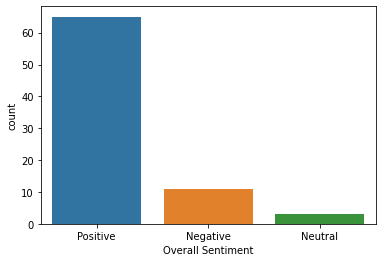

In [ ]:
import seaborn as sns
sns.countplot(vader['Overall Sentiment'])

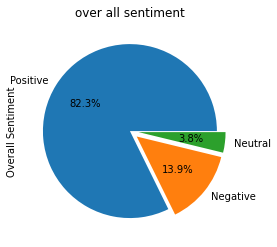

In [ ]:
explode = [0, 0.1, 0.1]
vader["Overall Sentiment"].value_counts().plot.pie(title="over all sentiment",autopct='%1.1f%%', 
                        explode = explode
                                 )

In [ ]:
df['overallSentiment']=vader["Overall Sentiment"]

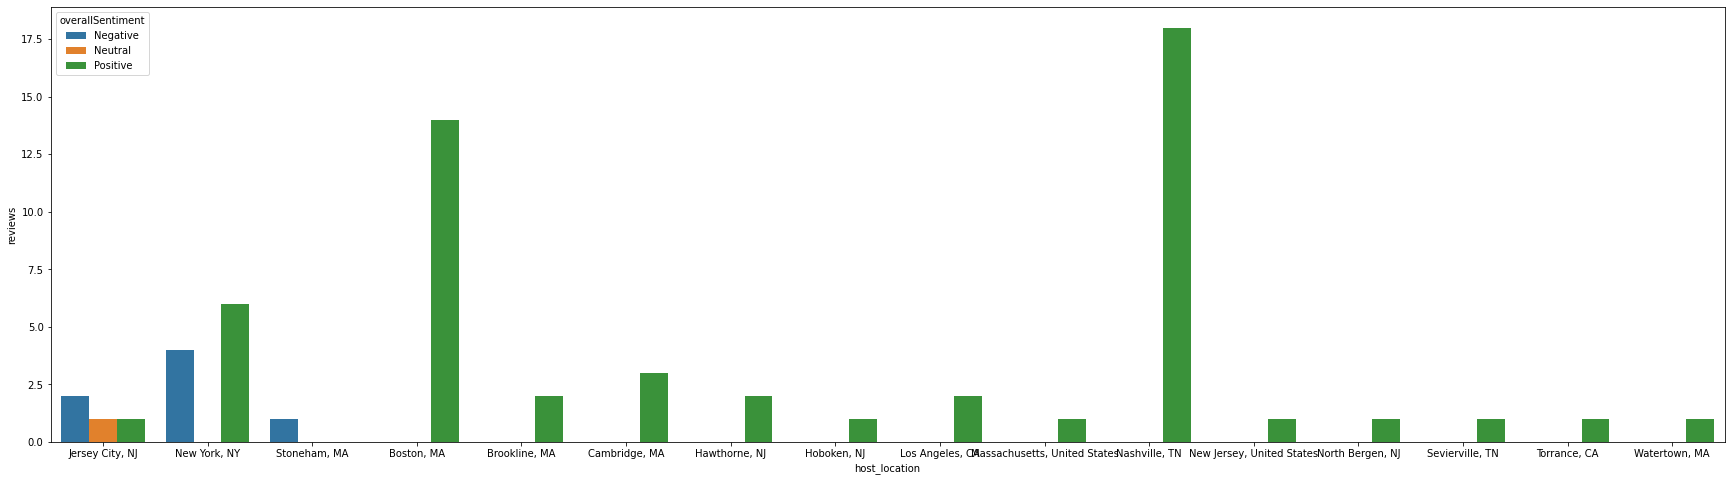

In [ ]:
time_df = df.groupby(['overallSentiment','host_location'])['reviews'].count().reset_index()
# time_df=time_df.loc[time_df['Overall Sentiment'] != 'Neutral']
plt.figure(figsize=(30,8))
sns.barplot(data=time_df,x='host_location',y='reviews',hue='overallSentiment')
plt.show()

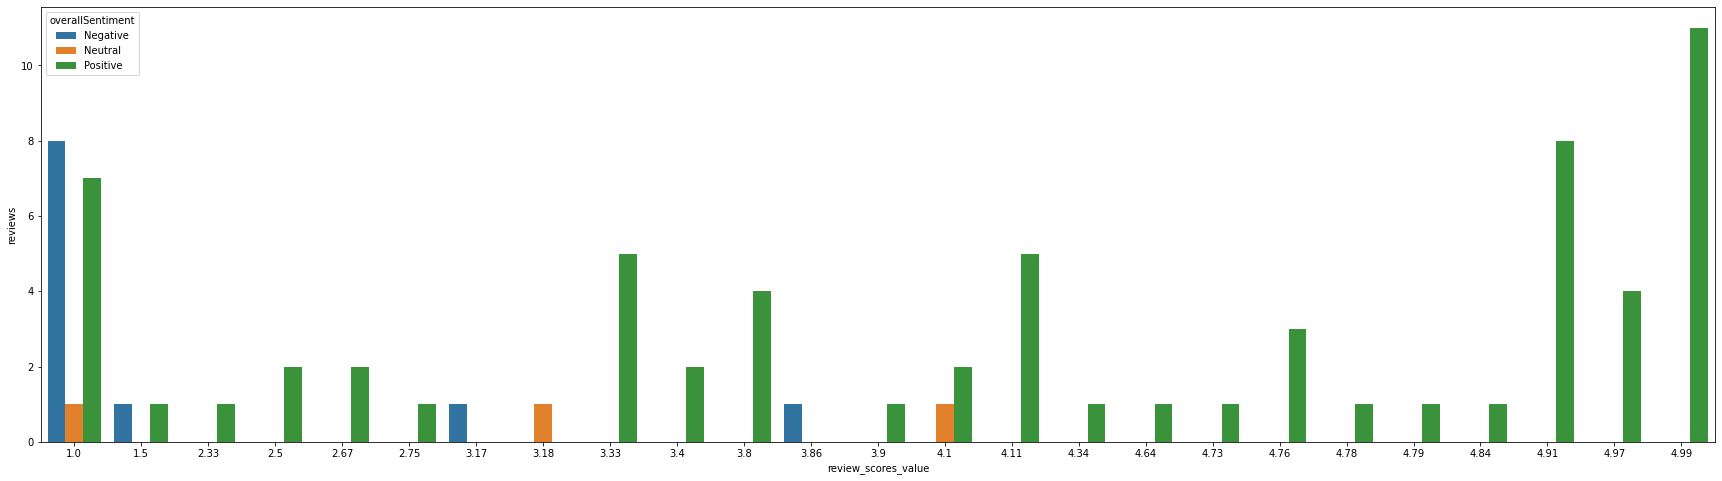

In [ ]:
time_df = df.groupby(['overallSentiment','review_scores_value'])['reviews'].count().reset_index()
# time_df=time_df.loc[time_df['Overall Sentiment'] != 'Neutral']
plt.figure(figsize=(30,8))
sns.barplot(data=time_df,x='review_scores_value',y='reviews',hue='overallSentiment')
plt.show()

In [ ]:
df

,id,name,host_location,neighbourhood,neighbourhood_cleansed,latitude,longitude,price,review_scores_value,reviews,overallSentiment
1,30387856,Charismatic 1BR in W. Village w/ Doorman & Gym,"New York, NY","New York, United States",Ward E (councilmember James Solomon),40.729222,-74.002791,418,1.00,lots problems maintenance ussues apartment mov...,Positive
2,5506,** Fort Hill Inn Private! Minutes to center!**,"Boston, MA","Boston, Massachusetts, United States",Roxbury,42.328440,-71.095810,149,4.73,stayed terry 3 nights guest room great clean e...,Positive
183,33607399,"FiDi 1BR w/ Roofdeck, Gym & Doorman nr Wall St.","New York, NY","New York, United States",Ward F (councilmember Jermaine D. Robinson),40.705040,-74.008120,547,1.00,worst experience airbnb br br blueground horri...,Negative
206,34420009,LUX CONDO 15 Min Times Square NYC Organic Smar...,NaN,"Jersey City, New Jersey, United States",Ward C (councilmember Richard Boggiano),40.738130,-74.047990,109,1.00,favorite thing living got check absolutely ter...,Positive
253,46006086,"Modern, Clean 1BR in Hudson Exchange w/ Gym + ...",NaN,"Jersey City, New Jersey, United States",Ward E (councilmember James Solomon),40.724545,-74.035912,417,1.00,terrible experience waited 3 hours baggage che...,Negative
...,...,...,...,...,...,...,...,...,...,...,...
5207,24246244,The Little Green Bungalow,"Nashville, TN","Nashville, Tennessee, United States",District 7,36.203300,-86.731020,129,4.99,impressed cleanliness house inside decorations...,Positive
5208,32958841,Goodwin Oasis,"Nashville, TN","Nashville, Tennessee, United States",District 29,36.089940,-86.623970,203,4.99,wildcat cottage amazing stay beautiful decor f...,Positive
5209,33013006,Charming and Private Detached Guesthouse in Ea...,"Nashville, TN","Nashville, Tennessee, United States",District 8,36.229690,-86.727730,86,4.99,clean even cuter person pictures convenient do...,Positive
5210,34331421,Spacious basement guest suite near airport/dwntn,"Nashville, TN","Nashville, Tennessee, United States",District 15,36.184250,-86.673460,110,4.99,beautiful home incredibly relaxing enjoyable i...,Positive


**Text Classification**



  **Count Vectorization**

In [ ]:
counts = feature_extraction.text.CountVectorizer()
X = counts.fit_transform(vader['reviews'].values)
X.shape

(79, 1438)

In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
vader['Overall Sentiment']= label_encoder.fit_transform(vader['Overall Sentiment'])

vader['Overall Sentiment'].unique()

array([2, 0, 1])

In [ ]:

y = vader['Overall Sentiment'].values

**Train Test Split**

In [ ]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=42)

**MultinomialNB**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
m3 = 'MultinomialNB'
rf = MultinomialNB()
classifier=rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)           
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("\n")
score_rf=rf_acc_score*100
print("MultinomialNB accuracy:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))



MultinomialNB accuracy: 62.5 

              precision    recall  f1-score   support

           0       0.20      0.33      0.25         3
           1       0.00      0.00      0.00         1
           2       0.82      0.75      0.78        12

    accuracy                           0.62        16
   macro avg       0.34      0.36      0.34        16
weighted avg       0.65      0.62      0.63        16



In [ ]:
# calculate prediction
precision = precision_score(y_test, rf_predicted, labels=[2, 0, 1], average='micro')
print('Precision: %.3f' % precision)

Precision: 0.625


In [ ]:
# calculate recall
recall = recall_score(y_test, rf_predicted, labels=[2, 0, 1], average='micro')
print('Recall: %.3f' % recall)

Recall: 0.625


In [ ]:
# calculate score
score = f1_score(y_test, rf_predicted,  average='micro')
print('F-Measure: %.3f' % score)

F-Measure: 0.625


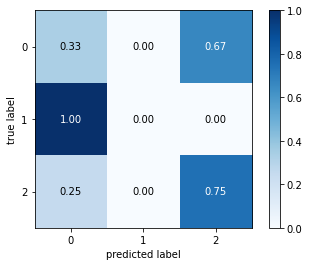

In [ ]:
# Imports
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

figure, ax = plot_confusion_matrix(conf_mat = rf_conf_matrix,
                                  #  class_names = classes,
                                   show_absolute = False,
                                   show_normed = True,
                                   colorbar = True)

plt.show()

**SVM**

In [ ]:
from sklearn import svm

m3 = 'SVM'
rf =  svm.SVC(decision_function_shape='ovo')
classifier=rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)           
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("\n")
score_rf=rf_acc_score*100
print("SVM accuarcy:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))



SVM accuarcy: 75.0 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         1
           2       0.75      1.00      0.86        12

    accuracy                           0.75        16
   macro avg       0.25      0.33      0.29        16
weighted avg       0.56      0.75      0.64        16



**Confusion Matrix**

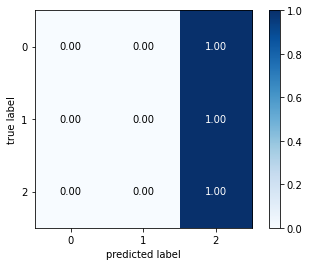

In [ ]:
# Imports
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

figure, ax = plot_confusion_matrix(conf_mat = rf_conf_matrix,
                                  #  class_names = classes,
                                   show_absolute = False,
                                   show_normed = True,
                                   colorbar = True)

plt.show()

In [ ]:
# calculate prediction
precision = precision_score(y_test, rf_predicted, labels=[2, 0, 1], average='micro')
print('Precision: %.3f' % precision)

Precision: 0.750


In [ ]:
# calculate recall
recall = recall_score(y_test, rf_predicted, labels=[2, 0, 1], average='micro')
print('Recall: %.3f' % recall)

Recall: 0.750


In [ ]:
# calculate score
score = f1_score(y_test, rf_predicted,  average='micro')
print('F-Measure: %.3f' % score)

F-Measure: 0.750


**RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf =  RandomForestClassifier(max_depth=3)
classifier=rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)           
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("\n")
score_rf=rf_acc_score*100
print("Random Forest :",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))



Random Forest : 75.0 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         1
           2       0.75      1.00      0.86        12

    accuracy                           0.75        16
   macro avg       0.25      0.33      0.29        16
weighted avg       0.56      0.75      0.64        16



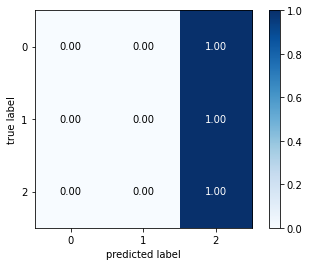

In [ ]:
# Imports
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

figure, ax = plot_confusion_matrix(conf_mat = rf_conf_matrix,
                                  #  class_names = classes,
                                   show_absolute = False,
                                   show_normed = True,
                                   colorbar = True)

plt.show()

In [ ]:
# calculate score
score = f1_score(y_test, rf_predicted,  average='micro')
print('F-Measure: %.3f' % score)

F-Measure: 0.750


In [ ]:
# calculate recall
recall = recall_score(y_test, rf_predicted, labels=[2, 0, 1], average='micro')
print('Recall: %.3f' % recall)

Recall: 0.750


In [ ]:
# calculate prediction
precision = precision_score(y_test, rf_predicted, labels=[2, 0, 1], average='micro')
print('Precision: %.3f' % precision)

Precision: 0.750
